In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
BASE = './dataset/'
train = pd.read_csv(BASE + 'train.csv')
test = pd.read_csv(BASE + 'test.csv')

In [3]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


|PassengerId|고유 번호|
|---|---|
|Survived|생존여부(1=Yes, 0=No)|
|Pclass|티켓 등급|
|Name|이름|
|Sex|성별|
|Age|나이|
|SibSp|같이 탄 가족(부모, 자식 관계 제외)|
|Parch|같이 탄 가족(부모, 자식 관계)|
|Ticket|티켓 번호|
|Fare|요금|
|Cabin|객실 번호|
|Embarked|승선한 항구|

In [4]:
train.shape, test.shape

((891, 12), (418, 11))

In [5]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<Axes: >

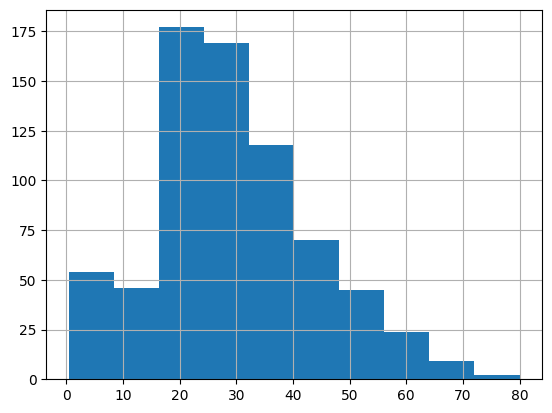

In [6]:
train['Age'].hist()

<Axes: >

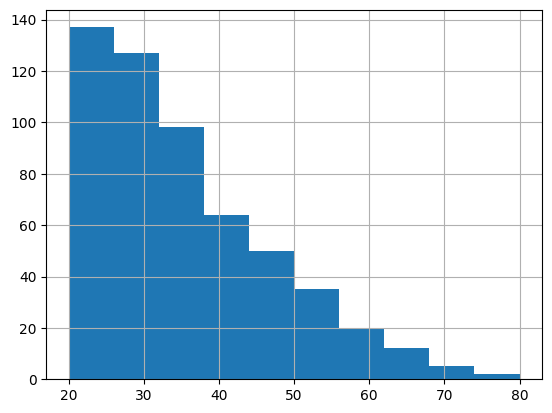

In [7]:
train[train['Age'] >= 20]['Age'].hist()

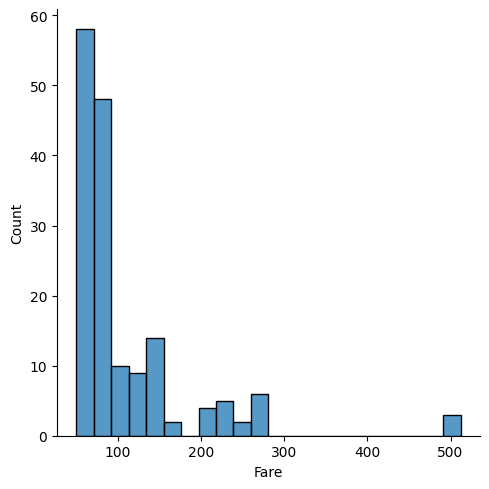

In [8]:
sns.displot(train[train['Fare'] >= 50]['Fare'])

<Axes: xlabel='Age', ylabel='Count'>

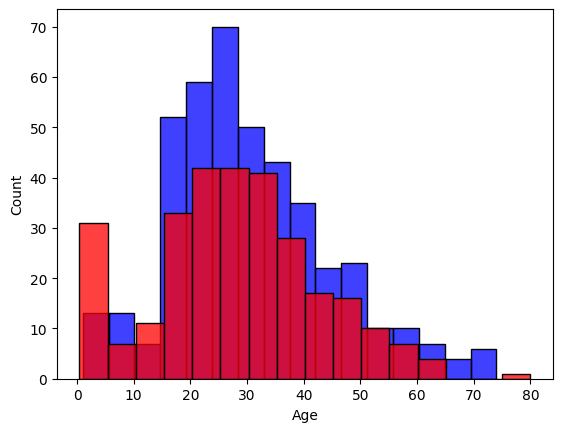

In [9]:
cond_1 = (train['Survived'] == 1)
cond_0 = (train['Survived'] == 0)

sns.histplot(train[cond_0]['Age'], label = "0", color = "blue")
sns.histplot(train[cond_1]['Age'], label = "1", color = "red")

<Axes: xlabel='Fare', ylabel='Count'>

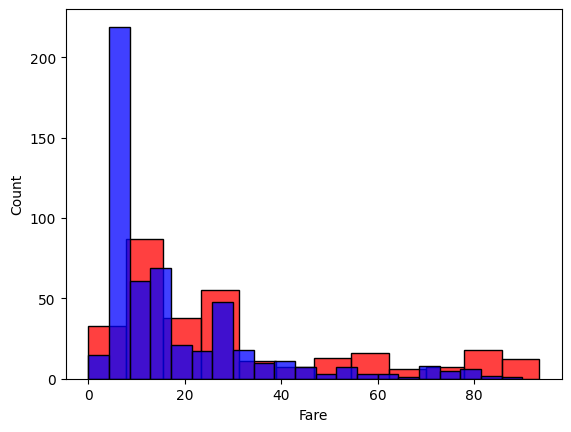

In [10]:
cond_1 = (train['Survived'] == 1)
cond_0 = (train['Survived'] == 0)
cond_fare = (train['Fare'] < 100)

sns.histplot(train[cond_1 & cond_fare]['Fare'], label = "1", color = "red")
sns.histplot(train[cond_0 & cond_fare]['Fare'], label = "0", color = "blue")

<Axes: xlabel='Survived', ylabel='Age'>

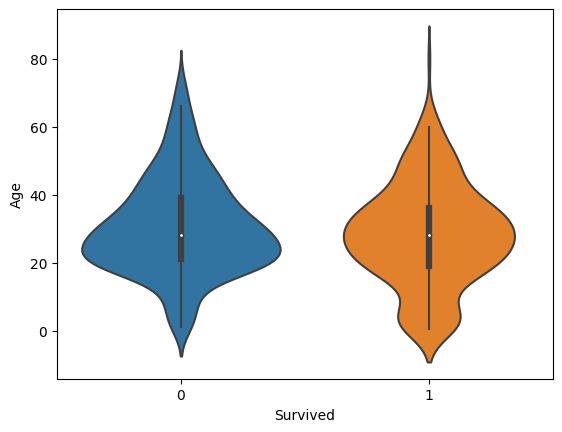

In [11]:
sns.violinplot(x='Survived', y='Age', data=train)

<Axes: xlabel='Age', ylabel='Count'>

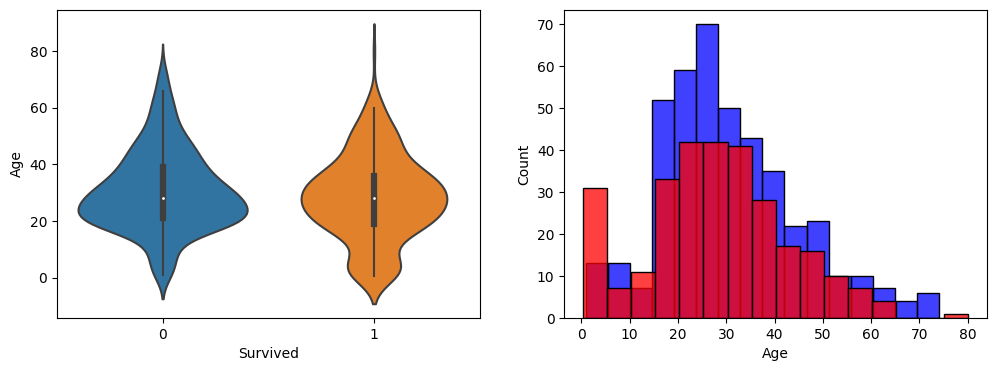

In [12]:
cond_1 = (train['Survived'] == 1)
cond_0 = (train['Survived'] == 0)

fig, axs = plt.subplots(figsize=(12, 4), nrows=1, ncols=2, squeeze=False)
sns.violinplot(x='Survived', y='Age', data=train, ax=axs[0][0])
sns.histplot(train[cond_0]['Age'], label = "0", color = "blue", ax=axs[0][1])
sns.histplot(train[cond_1]['Age'], label = "1", color = "red", ax=axs[0][1])

In [13]:
train.shape, test.shape

((891, 12), (418, 11))

In [14]:
data = pd.concat([train, test])
data.shape

(1309, 12)

In [15]:
data['Survived'].value_counts(dropna=False)

0.0    549
NaN    418
1.0    342
Name: Survived, dtype: int64

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [17]:
object_columns = data.dtypes[data.dtypes == 'object'].index.tolist()

for column in object_columns:
    data[column] = pd.factorize(data[column])[0]
    
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   int64  
 4   Sex          1309 non-null   int64  
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   int64  
 9   Fare         1308 non-null   float64
 10  Cabin        1309 non-null   int64  
 11  Embarked     1309 non-null   int64  
dtypes: float64(3), int64(9)
memory usage: 132.9 KB


In [18]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,0,0,22.0,1,0,0,7.2500,-1,0
1,2,1.0,1,1,1,38.0,1,0,1,71.2833,0,1
2,3,1.0,3,2,1,26.0,0,0,2,7.9250,-1,0
3,4,1.0,1,3,1,35.0,1,0,3,53.1000,1,0
4,5,0.0,3,4,0,35.0,0,0,4,8.0500,-1,0
5,6,0.0,3,5,0,NaN,0,0,5,8.4583,-1,2
6,7,0.0,1,6,0,54.0,0,0,6,51.8625,2,0
7,8,0.0,3,7,0,2.0,3,1,7,21.0750,-1,0
8,9,1.0,3,8,1,27.0,0,2,8,11.1333,-1,0
9,10,1.0,2,9,1,14.0,1,0,9,30.0708,-1,1


In [19]:
data.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age            263
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin            0
Embarked         0
dtype: int64

In [20]:
data = data.fillna(-999)
data = data.astype({'Survived': 'int64'})
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [21]:
train = data[data['Survived'] != -999]
test = data[data['Survived'] == -999]

train.shape, test.shape

((891, 12), (418, 12))

In [22]:
test = test.drop(['Survived'], axis=1, inplace=False)
test.shape

(418, 11)

In [23]:
feature = train.drop(['PassengerId', 'Survived'], axis=1)
target = train['Survived']

In [24]:
from sklearn.model_selection import train_test_split

train_x, valid_x, train_y, valid_y = train_test_split(feature, target, test_size=0.2, random_state=2020)
train_x.shape, valid_x.shape

((712, 10), (179, 10))

In [25]:
from lightgbm import LGBMClassifier

clf = LGBMClassifier(
        n_jobs=-1,
        n_estimators=1000,
        learning_rate=0.02,
        num_leaves=32,
        subsample=0.8,
        max_depth=12,
        silent=-1,
        verbose=-1
        )

clf.fit(train_x, train_y, eval_set=[(train_x, train_y), (valid_x, valid_y)], 
eval_metric= 'auc', verbose= 100, early_stopping_rounds= 100)

[100]	training's auc: 0.954241	training's binary_logloss: 0.317466	valid_1's auc: 0.832883	valid_1's binary_logloss: 0.484577


C:\Users\dnals\anaconda3\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\dnals\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\dnals\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a f

LGBMClassifier(learning_rate=0.02, max_depth=12, n_estimators=1000,
               num_leaves=32, silent=-1, subsample=0.8, verbose=-1)

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

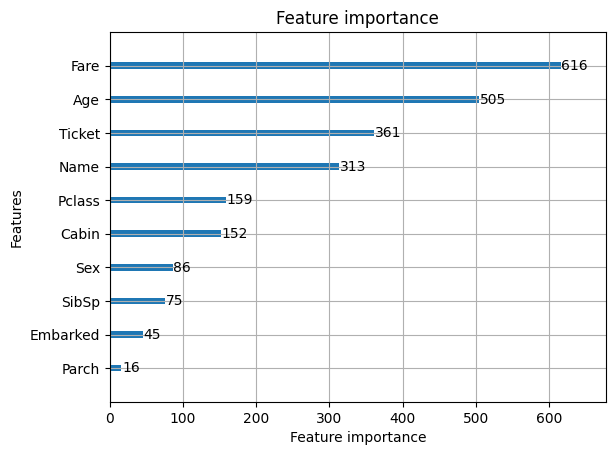

In [26]:
from lightgbm import plot_importance

plot_importance(clf)

In [27]:
preds = clf.predict_proba(test.drop(['PassengerId'], axis=1))[:, 1]

for idx, pred in enumerate(preds):
    if pred >= 0.5:
        preds[idx] = 1
    else :
        preds[idx] = 0

preds = preds.astype('int64')

In [28]:
test['Survived'] = preds
test['Survived'].head()

0    0
1    1
2    0
3    0
4    0
Name: Survived, dtype: int64

In [29]:
test[['PassengerId', 'Survived']].to_csv('./dataset/submit1.csv', index=False)

In [30]:
submit = pd.read_csv(BASE + 'submit1.csv')
submit

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
